**Object Detection Using single stage detector Using YOLO**

In [ ]:
# Ensure required packages are installed
!pip install ultralytics  # Install YOLO package
!pip install opencv-python-headless  # To use OpenCV functions


In [ ]:
import cv2  # OpenCV for image handling
from ultralytics import YOLO  # YOLO model
import matplotlib.pyplot as plt  # For plotting images
import numpy as np  # For numerical operations
from google.colab.patches import cv2_imshow  # For displaying images in Colab


**Load a Pre-Trained YOLOv5 Model**

In [ ]:
!pip install --upgrade ultralytics


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the yolov5s.pt file


Saving yolov5s-seg.pt to yolov5s-seg.pt


In [ ]:
# Ensure the correct model path is specified
model_path = "/content/yolov5s.pt"  # If you uploaded to Colab
model = YOLO(model_path)  # Load the model from a specific path


PRO TIP 💡 Replace 'model=/content/yolov5s.pt' with new 'model=/content/yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 92.7MB/s]


In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload an image manually
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file


Saving tr.jpg to tr.jpg


In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Define the image path in Google Drive
image_path = "/content/drive/MyDrive/tr.jpg"  # Change to your image's path


Mounted at /content/drive


In [ ]:
# Double-check the image path
image_path = "/content/tr.jpg"  # Adjust based on your image location

# Try to read the image again
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image at '{image_path}' not found.")


In [ ]:
# Load the image
image = cv2.imread(image_path)  # Read the image from the specified path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plotting

# Perform object detection
results = model(image_rgb)  # Perform detection
detections = results[0]  # First (and only) detection result



0: 448x640 1 person, 17 cars, 3 trucks, 866.4ms
Speed: 21.4ms preprocess, 866.4ms inference, 4812.4ms postprocess per image at shape (1, 3, 448, 640)


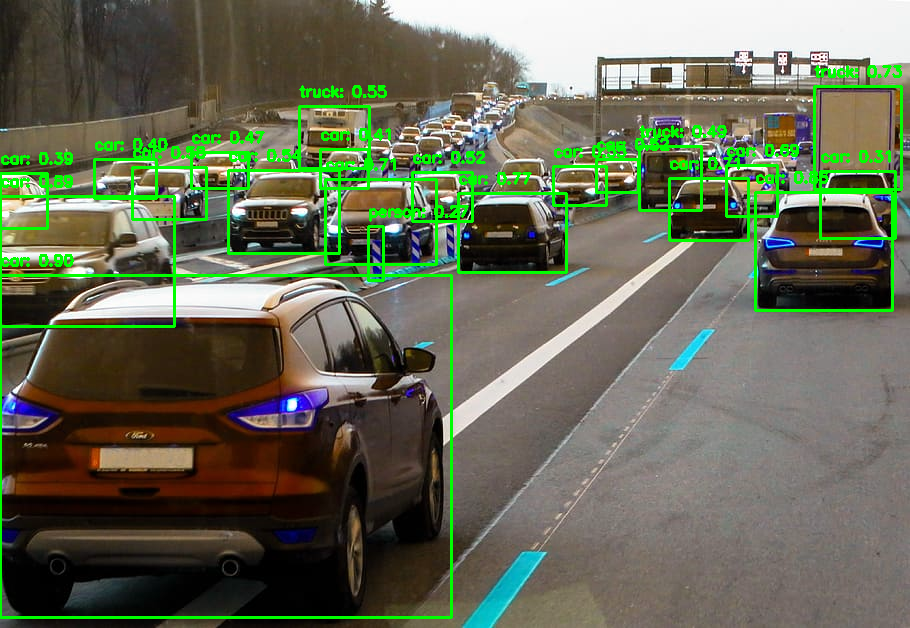

In [ ]:
import cv2
import torch

# Create a copy of the image to draw bounding boxes
image_with_boxes = image_rgb.copy()

# Loop through detected objects and draw bounding boxes with labels
for detection in detections.boxes:
    # Get bounding box coordinates
    box = detection.xyxy[0].cpu().numpy()
    class_id = int(detection.cls)  # Class ID
    confidence = float(detection.conf)  # Confidence score
    label = model.names[class_id]  # Get the class name

    # Draw the bounding box
    x1, y1, x2, y2 = map(int, box)  # Convert coordinates to integers
    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw box

    # Convert confidence to float and draw the text with correct formatting
    cv2.putText(image_with_boxes, f"{label}: {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Add label

# Display the image with bounding boxes
from google.colab.patches import cv2_imshow  # To display images in Colab
cv2_imshow(image_with_boxes)


**object detection with two stage detectors Yolo**



In [ ]:
# Install Git and clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required packages, including PyTorch
!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
# Download a sample image
!wget -O sample_image.jpg https://ultralytics.com/images/zidane.jpg

# Run YOLOv5 with pre-trained model 'yolov5s.pt' (small model)
!python detect.py --weights yolov5s.pt --source sample_image.jpg --conf 0.5


--2024-05-03 19:07:26--  https://ultralytics.com/images/zidane.jpg
Resolving ultralytics.com (ultralytics.com)... 75.2.70.75, 99.83.190.102
Connecting to ultralytics.com (ultralytics.com)|75.2.70.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/zidane.jpg [following]
--2024-05-03 19:07:26--  https://www.ultralytics.com/images/zidane.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 104.18.0.125, 104.18.1.125, 2606:4700::6812:17d, ...
Connecting to www.ultralytics.com (www.ultralytics.com)|104.18.0.125|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg [following]
--2024-05-03 19:07:27--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.1

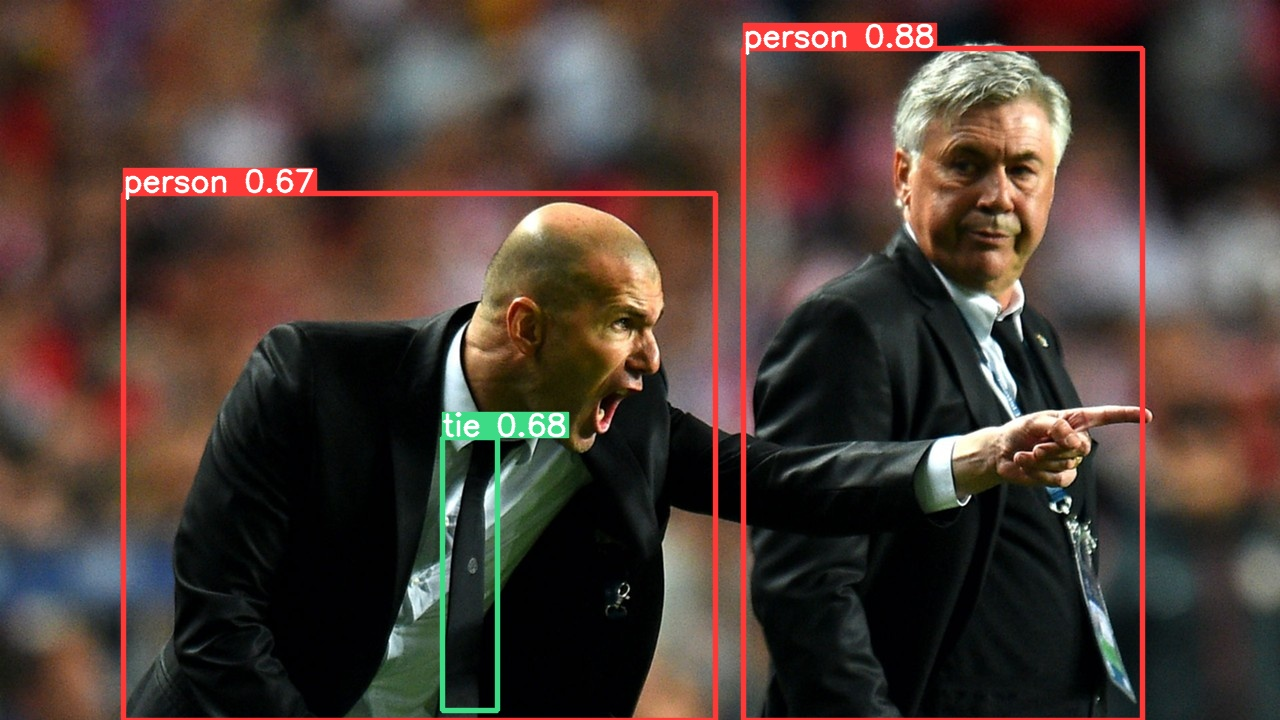

In [ ]:
from PIL import Image
import IPython.display as display

# Load and display the detected image from the output directory
output_image_path = 'runs/detect/exp/sample_image.jpg'  # Adjust as needed
image = Image.open(output_image_path)
display.display(image)
